In [1]:
#import standard lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [2]:
#to load csv
df=pd.read_csv("Job_Placement_Data.csv")
df.head()
#here output is status (TARGET) : Status of placement. Placed / Not Placed

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [3]:
#check no of records
df.shape

(215, 13)

gender                 0
ssc_percentage         0
ssc_board              0
hsc_percentage         0
hsc_board              0
hsc_subject            0
degree_percentage      0
undergrad_degree       0
work_experience        0
emp_test_percentage    0
specialisation         0
mba_percent            0
status                 0
dtype: int64


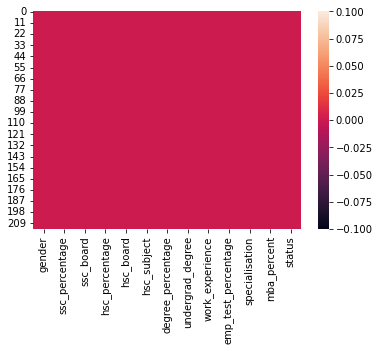

In [4]:
#check null values
f=df.isnull().sum()
print(f)
sb.heatmap(df.isnull())
plt.show()

In [5]:
#check duplicates value
df.duplicated().sum()

0

In [6]:
#cross check with datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               215 non-null    object 
 1   ssc_percentage       215 non-null    float64
 2   ssc_board            215 non-null    object 
 3   hsc_percentage       215 non-null    float64
 4   hsc_board            215 non-null    object 
 5   hsc_subject          215 non-null    object 
 6   degree_percentage    215 non-null    float64
 7   undergrad_degree     215 non-null    object 
 8   work_experience      215 non-null    object 
 9   emp_test_percentage  215 non-null    float64
 10  specialisation       215 non-null    object 
 11  mba_percent          215 non-null    float64
 12  status               215 non-null    object 
dtypes: float64(5), object(8)
memory usage: 22.0+ KB


Placed        148
Not Placed     67
Name: status, dtype: int64


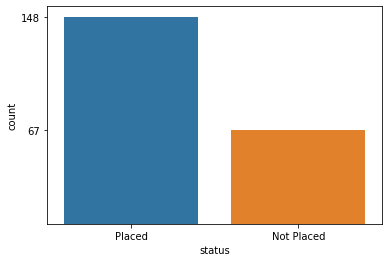

In [7]:
#check data bal or not in o/p variable
#check data is bal or not
f=df['status'].value_counts()
sb.countplot(data=df,x='status')
print(f)
plt.yticks(f)
plt.show()
#so here dataset is unbanced 

Central    116
Others      99
Name: ssc_board, dtype: int64


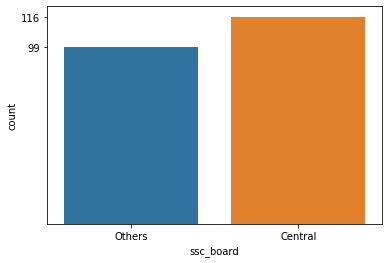

In [8]:
#check cat of ssc_board which is object type data
f=df['ssc_board'].value_counts()
print(f)
sb.countplot(data=df,x='ssc_board')
plt.yticks(f)
plt.show()

M    139
F     76
Name: gender, dtype: int64


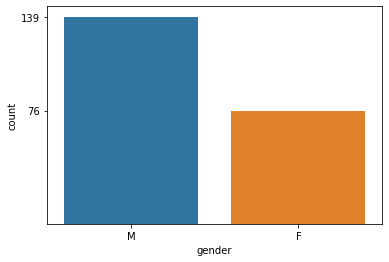

In [9]:
#check cat of gender object type data
f=df['gender'].value_counts()
print(f)
sb.countplot(data=df,x='gender')
plt.yticks(f)
plt.show()

Others     131
Central     84
Name: hsc_board, dtype: int64


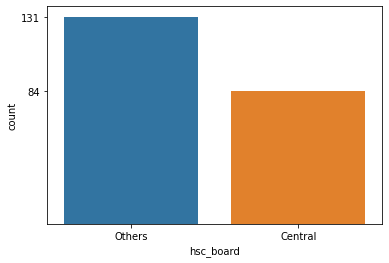

In [10]:
#check cat of hsc_board object type data
f=df['hsc_board'].value_counts()
print(f)
sb.countplot(data=df,x='hsc_board')
plt.yticks(f)
plt.show()

Commerce    113
Science      91
Arts         11
Name: hsc_subject, dtype: int64


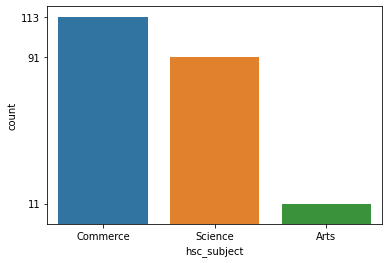

In [11]:
#check cat of hsc_subject object type data
f=df['hsc_subject'].value_counts()
print(f)
sb.countplot(data=df,x='hsc_subject')
plt.yticks(f)
plt.show()

Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: undergrad_degree, dtype: int64


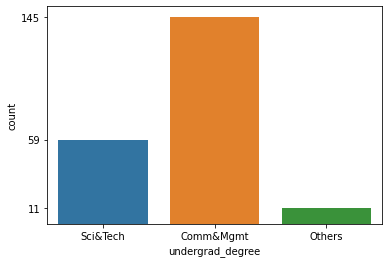

In [12]:
#check cat of undergrad_degree object type data
f=df['undergrad_degree'].value_counts()
print(f)
sb.countplot(data=df,x='undergrad_degree')
plt.yticks(f)
plt.show()

No     141
Yes     74
Name: work_experience, dtype: int64


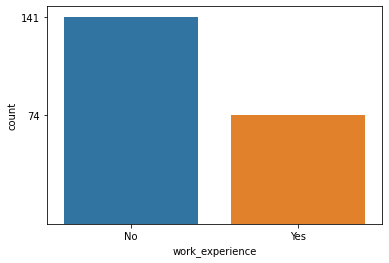

In [14]:
#check cat of work_experience object type data
f=df['work_experience'].value_counts()
print(f)
sb.countplot(data=df,x='work_experience')
plt.yticks(f)
plt.show()

Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64


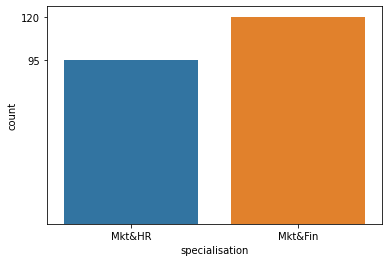

In [15]:
#check cat of specialisation object type data
f=df['specialisation'].value_counts()
print(f)
sb.countplot(data=df,x='specialisation')
plt.yticks(f)
plt.show()

In [16]:
#convert object type data to numeric
from sklearn.preprocessing import LabelEncoder

In [17]:
df_num=df.select_dtypes(['float64'])

df_cat=df.select_dtypes(object) 

In [18]:
from sklearn.preprocessing import LabelEncoder

for col in df_cat:
    
    le=LabelEncoder()
    
    df_cat[col]=le.fit_transform(df_cat[col])

In [19]:
df_cat.head()

,gender,ssc_board,hsc_board,hsc_subject,undergrad_degree,work_experience,specialisation,status
0,1,1,1,1,2,0,1,1
1,1,0,1,2,2,1,0,1
2,1,0,0,0,0,0,0,1
3,1,0,0,2,2,0,1,0
4,1,0,0,1,0,0,0,1


In [20]:
df_cat.dtypes

gender              int32
ssc_board           int32
hsc_board           int32
hsc_subject         int32
undergrad_degree    int32
work_experience     int32
specialisation      int32
status              int32
dtype: object

In [21]:
#to merge both dataframe df_num and df_cat
#use pandas feauture pd.concat()
df_new=pd.concat([df_num,df_cat],axis=1)
df_new.dtypes

ssc_percentage         float64
hsc_percentage         float64
degree_percentage      float64
emp_test_percentage    float64
mba_percent            float64
gender                   int32
ssc_board                int32
hsc_board                int32
hsc_subject              int32
undergrad_degree         int32
work_experience          int32
specialisation           int32
status                   int32
dtype: object

In [22]:
df_new.head()

,ssc_percentage,hsc_percentage,degree_percentage,emp_test_percentage,mba_percent,gender,ssc_board,hsc_board,hsc_subject,undergrad_degree,work_experience,specialisation,status
0,67.00,91.00,58.00,55.0,58.80,1,1,1,1,2,0,1,1
1,79.33,78.33,77.48,86.5,66.28,1,0,1,2,2,1,0,1
2,65.00,68.00,64.00,75.0,57.80,1,0,0,0,0,0,0,1
3,56.00,52.00,52.00,66.0,59.43,1,0,0,2,2,0,1,0
4,85.80,73.60,73.30,96.8,55.50,1,0,0,1,0,0,0,1


In [23]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ssc_percentage       215 non-null    float64
 1   hsc_percentage       215 non-null    float64
 2   degree_percentage    215 non-null    float64
 3   emp_test_percentage  215 non-null    float64
 4   mba_percent          215 non-null    float64
 5   gender               215 non-null    int32  
 6   ssc_board            215 non-null    int32  
 7   hsc_board            215 non-null    int32  
 8   hsc_subject          215 non-null    int32  
 9   undergrad_degree     215 non-null    int32  
 10  work_experience      215 non-null    int32  
 11  specialisation       215 non-null    int32  
 12  status               215 non-null    int32  
dtypes: float64(5), int32(8)
memory usage: 15.2 KB


In [24]:
#select input and output from given dataset
X=df_new.drop('status',axis=1) #select input 
Y=df_new['status'] #select output

In [25]:
X.head()

,ssc_percentage,hsc_percentage,degree_percentage,emp_test_percentage,mba_percent,gender,ssc_board,hsc_board,hsc_subject,undergrad_degree,work_experience,specialisation
0,67.00,91.00,58.00,55.0,58.80,1,1,1,1,2,0,1
1,79.33,78.33,77.48,86.5,66.28,1,0,1,2,2,1,0
2,65.00,68.00,64.00,75.0,57.80,1,0,0,0,0,0,0
3,56.00,52.00,52.00,66.0,59.43,1,0,0,2,2,0,1
4,85.80,73.60,73.30,96.8,55.50,1,0,0,1,0,0,0


In [26]:
#apply train_test_split on 70% training data and 30% testing data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [27]:
X_train.shape,X_test.shape

((150, 12), (65, 12))

In [28]:
#check data in output
Y_train.value_counts()

1    103
0     47
Name: status, dtype: int64

In [29]:
#convert minority class to majority class
#using random over sampler method
from imblearn.over_sampling import RandomOverSampler

In [30]:
#create object of RandomOverSampler class
ros=RandomOverSampler(random_state=1)
X_train1,Y_train1=ros.fit_resample(X_train,Y_train)

In [31]:
#check bal
Y_train1.value_counts()
#here data is bal

1    103
0    103
Name: status, dtype: int64

In [32]:
#apply on testing data also
X_test1,Y_test1=ros.fit_resample(X_test,Y_test)

In [33]:
#check bal
Y_test1.value_counts()

1    45
0    45
Name: status, dtype: int64

In [34]:
#apply standard scaler on input
from sklearn.preprocessing import StandardScaler

In [35]:
#create object of StandardScaler class
ss=StandardScaler()

In [36]:
X_train1=ss.fit_transform(X_train1) #convert into numpy array
X_test1=ss.transform(X_test1)#convert into numpy array

In [37]:
#create fn
def create_model(model):
    
    #train data with 70%
    model.fit(X_train1,Y_train1)
    #test datawith 30%
    Y_pred=model.predict(X_test1)
    #generate report
    print(classification_report(Y_test1,Y_pred))
    print(confusion_matrix(Y_test1,Y_pred))
    
    return model

In [38]:
from sklearn.metrics import classification_report,confusion_matrix

In [39]:
#give dataset to logistregression
from sklearn.linear_model import LogisticRegression
#create object of class
lr=LogisticRegression()

In [40]:
#call fn
lr=create_model(lr)
#here recall check 
#recall is 87%

              precision    recall  f1-score   support

           0       0.87      0.87      0.87        45
           1       0.87      0.87      0.87        45

    accuracy                           0.87        90
   macro avg       0.87      0.87      0.87        90
weighted avg       0.87      0.87      0.87        90

[[39  6]
 [ 6 39]]


In [41]:
#give dataset to decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [42]:
#create object of DecisionTreeClassifier class
dt=DecisionTreeClassifier(random_state=1) #by default gini

In [43]:
#call fn
dt=create_model(dt)
#here recall of 1 is 87% but diff in 0 and 1 is big

              precision    recall  f1-score   support

           0       0.79      0.51      0.62        45
           1       0.64      0.87      0.74        45

    accuracy                           0.69        90
   macro avg       0.72      0.69      0.68        90
weighted avg       0.72      0.69      0.68        90

[[23 22]
 [ 6 39]]


In [44]:
#check information gain :
dict={"input":X.columns,"IG":dt.feature_importances_}
df1=pd.DataFrame(dict)
#sorting in desending order
#change record no as per sorting
df1.sort_values('IG',ascending=False,ignore_index=True)

,input,IG
0,ssc_percentage,0.514678
1,hsc_percentage,0.206625
2,mba_percent,0.136497
3,emp_test_percentage,0.083449
4,work_experience,0.045076
5,specialisation,0.009709
6,undergrad_degree,0.003967
7,degree_percentage,0.000000
8,gender,0.000000
9,ssc_board,0.000000


In [45]:
dt1=DecisionTreeClassifier(random_state=1,max_depth=8)
#call fn
dt1=create_model(dt1)
#at max depth 8 recall is 87% but diff between 0 and 1 is to high

              precision    recall  f1-score   support

           0       0.79      0.51      0.62        45
           1       0.64      0.87      0.74        45

    accuracy                           0.69        90
   macro avg       0.72      0.69      0.68        90
weighted avg       0.72      0.69      0.68        90

[[23 22]
 [ 6 39]]


In [46]:
#check information gain
dict={"Input":X.columns,"IG":dt1.feature_importances_}
#convert to dataframe
df2=pd.DataFrame(dict)
#sorting
df2.sort_values("IG",ascending=False,ignore_index=True)

,Input,IG
0,ssc_percentage,0.534701
1,hsc_percentage,0.204337
2,mba_percent,0.131720
3,emp_test_percentage,0.068204
4,work_experience,0.046830
5,specialisation,0.010086
6,undergrad_degree,0.004121
7,degree_percentage,0.000000
8,gender,0.000000
9,ssc_board,0.000000


In [47]:
#apply second pruning technique min_samples_leaf

In [48]:
#create object of decisiontreeclassifier
dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=91)
#call fn
dt2=create_model(dt2)
#here recall is 78%

              precision    recall  f1-score   support

           0       0.78      0.80      0.79        45
           1       0.80      0.78      0.79        45

    accuracy                           0.79        90
   macro avg       0.79      0.79      0.79        90
weighted avg       0.79      0.79      0.79        90

[[36  9]
 [10 35]]


In [49]:
#check information gain
dict={"input":X.columns,"IG":dt2.feature_importances_}
#convert to dataframe
df3=pd.DataFrame(dict)
#sorting
df3.sort_values("IG",ascending=False,ignore_index=True)
#here not imp features get o

,input,IG
0,ssc_percentage,1.0
1,hsc_percentage,0.0
2,degree_percentage,0.0
3,emp_test_percentage,0.0
4,mba_percent,0.0
5,gender,0.0
6,ssc_board,0.0
7,hsc_board,0.0
8,hsc_subject,0.0
9,undergrad_degree,0.0


In [50]:
#create object of DecisionTreeClassifier class
dt_entropy=DecisionTreeClassifier(random_state=1,criterion='entropy') 

In [51]:
#call fn
dt_entropy=create_model(dt_entropy)
#here recall is 82% 

              precision    recall  f1-score   support

           0       0.74      0.51      0.61        45
           1       0.63      0.82      0.71        45

    accuracy                           0.67        90
   macro avg       0.68      0.67      0.66        90
weighted avg       0.68      0.67      0.66        90

[[23 22]
 [ 8 37]]


In [52]:
#check IG
dict={"input":X.columns,"IG":dt_entropy.feature_importances_}
#convert to dataframe
df4=pd.DataFrame(dict)
#sorting
df4.sort_values("IG",ascending=False,ignore_index=True)

,input,IG
0,ssc_percentage,0.429923
1,hsc_percentage,0.225255
2,mba_percent,0.202308
3,degree_percentage,0.057584
4,work_experience,0.031500
5,hsc_board,0.027779
6,undergrad_degree,0.013373
7,emp_test_percentage,0.012278
8,gender,0.000000
9,ssc_board,0.000000


In [53]:
#create object of DecisionTreeClassifier class
dt_entropy1=DecisionTreeClassifier(random_state=1,max_depth=6,criterion='entropy')
#call fn
dt_entropy1=create_model(dt_entropy1)
#here recall is 80%

              precision    recall  f1-score   support

           0       0.81      0.84      0.83        45
           1       0.84      0.80      0.82        45

    accuracy                           0.82        90
   macro avg       0.82      0.82      0.82        90
weighted avg       0.82      0.82      0.82        90

[[38  7]
 [ 9 36]]


In [54]:
#check IG
dict={"input":X.columns,"IG":dt_entropy1.feature_importances_}
#convert to dataframe
df5=pd.DataFrame(dict)
#sorting
df5.sort_values("IG",ascending=False,ignore_index=True)

,input,IG
0,ssc_percentage,0.522485
1,hsc_percentage,0.235463
2,mba_percent,0.174475
3,work_experience,0.038281
4,degree_percentage,0.029296
5,emp_test_percentage,0.000000
6,gender,0.000000
7,ssc_board,0.000000
8,hsc_board,0.000000
9,hsc_subject,0.000000


In [55]:
#create object of DT
dt_entropy2=DecisionTreeClassifier(random_state=1,min_samples_leaf=91,criterion='entropy')
#call fn
dt_entropy2=create_model(dt_entropy2)
#at min_samples_leaf=45 then recall is 78%

              precision    recall  f1-score   support

           0       0.78      0.80      0.79        45
           1       0.80      0.78      0.79        45

    accuracy                           0.79        90
   macro avg       0.79      0.79      0.79        90
weighted avg       0.79      0.79      0.79        90

[[36  9]
 [10 35]]


In [56]:
#check IG
dict={"input":X.columns,"IG":dt_entropy2.feature_importances_}
#convert to dataframe
df6=pd.DataFrame(dict)
#sorting
df6.sort_values("IG",ascending=False,ignore_index=True)

,input,IG
0,ssc_percentage,1.0
1,hsc_percentage,0.0
2,degree_percentage,0.0
3,emp_test_percentage,0.0
4,mba_percent,0.0
5,gender,0.0
6,ssc_board,0.0
7,hsc_board,0.0
8,hsc_subject,0.0
9,undergrad_degree,0.0


In [57]:
#give dataset to random forest classifer

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
#create object of RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=51,random_state=1)
#call fn
rfc=create_model(rfc)
#here recall is 91% bur diff between 0 and 1 is 9%

              precision    recall  f1-score   support

           0       0.90      0.82      0.86        45
           1       0.84      0.91      0.87        45

    accuracy                           0.87        90
   macro avg       0.87      0.87      0.87        90
weighted avg       0.87      0.87      0.87        90

[[37  8]
 [ 4 41]]


In [60]:
#check information gain :
dict={"input":X.columns,"IG":rfc.feature_importances_}
#convert dict to dataframe
df1=pd.DataFrame(dict)
#sorting in desending order
#change record no as per sorting
df1.sort_values('IG',ascending=False,ignore_index=True)

,input,IG
0,ssc_percentage,0.262160
1,hsc_percentage,0.216279
2,degree_percentage,0.148421
3,mba_percent,0.122817
4,emp_test_percentage,0.093897
5,work_experience,0.039273
6,gender,0.025392
7,specialisation,0.023810
8,hsc_subject,0.020072
9,undergrad_degree,0.019837


In [61]:
rfc1=RandomForestClassifier(n_estimators=51,random_state=1,max_depth=8) 
#call function 
rfc1=create_model(rfc1)
#here recall is 93% but diff between 0 and 1 cat is high

              precision    recall  f1-score   support

           0       0.91      0.71      0.80        45
           1       0.76      0.93      0.84        45

    accuracy                           0.82        90
   macro avg       0.84      0.82      0.82        90
weighted avg       0.84      0.82      0.82        90

[[32 13]
 [ 3 42]]


In [62]:
rfc2=RandomForestClassifier(n_estimators=51,random_state=1,min_samples_leaf=64) 
#call fn
rfc2=create_model(rfc2)
#here recall is 78%

              precision    recall  f1-score   support

           0       0.78      0.80      0.79        45
           1       0.80      0.78      0.79        45

    accuracy                           0.79        90
   macro avg       0.79      0.79      0.79        90
weighted avg       0.79      0.79      0.79        90

[[36  9]
 [10 35]]


In [63]:
#check information gain :
dict={"input":X.columns,"IG":rfc2.feature_importances_}
#convert dict to dataframe
df2=pd.DataFrame(dict)
#sorting in desending order
#change record no as per sorting
df2.sort_values('IG',ascending=False,ignore_index=True)

,input,IG
0,ssc_percentage,0.333333
1,specialisation,0.259259
2,mba_percent,0.185185
3,hsc_percentage,0.111111
4,emp_test_percentage,0.037037
5,ssc_board,0.037037
6,hsc_board,0.037037
7,degree_percentage,0.000000
8,gender,0.000000
9,hsc_subject,0.000000


In [64]:
#apply boosting technique
#first apply ADA boost
from sklearn.ensemble import AdaBoostClassifier

In [65]:
X.shape

(215, 12)

In [66]:
#create object of AdaBoostClassifier
ada=AdaBoostClassifier(random_state=1,n_estimators=7)
#call fn
ada=create_model(ada)
#here recall is 84% but diff between 0 and 1 is 7%

              precision    recall  f1-score   support

           0       0.85      0.91      0.88        45
           1       0.90      0.84      0.87        45

    accuracy                           0.88        90
   macro avg       0.88      0.88      0.88        90
weighted avg       0.88      0.88      0.88        90

[[41  4]
 [ 7 38]]


In [67]:
#check imp features
#check information gain :
dict={"input":X.columns,"IG":ada.feature_importances_}
#convert dict to dataframe
df1=pd.DataFrame(dict)
#sorting in desending order
#change record no as per sorting
df1.sort_values('IG',ascending=False,ignore_index=True)

,input,IG
0,ssc_percentage,0.285714
1,mba_percent,0.285714
2,hsc_percentage,0.142857
3,degree_percentage,0.142857
4,work_experience,0.142857
5,emp_test_percentage,0.000000
6,gender,0.000000
7,ssc_board,0.000000
8,hsc_board,0.000000
9,hsc_subject,0.000000


In [68]:
#apply second boosting tech gradient boost
from sklearn.ensemble import GradientBoostingClassifier

In [69]:
#create object of GradientBoostingClassifier class
gbc=GradientBoostingClassifier(random_state=1,n_estimators=20)
#call fn
gbc=create_model(gbc)
#here recall is 89% and diff between cat 0 and 1 is high
#and n_estimator=20
#after 20 iteration shows imp feature

              precision    recall  f1-score   support

           0       0.84      0.60      0.70        45
           1       0.69      0.89      0.78        45

    accuracy                           0.74        90
   macro avg       0.77      0.74      0.74        90
weighted avg       0.77      0.74      0.74        90

[[27 18]
 [ 5 40]]


In [70]:
#check imp features
#check information gain :
dict={"input":X.columns,"IG":gbc.feature_importances_}
#convert dict to dataframe
df2=pd.DataFrame(dict)
#sorting in desending order
#change record no as per sorting
df2.sort_values('IG',ascending=False,ignore_index=True)

,input,IG
0,ssc_percentage,0.589199
1,hsc_percentage,0.151872
2,mba_percent,0.108346
3,degree_percentage,0.050890
4,work_experience,0.028134
5,emp_test_percentage,0.028126
6,gender,0.015279
7,specialisation,0.011894
8,hsc_board,0.010239
9,hsc_subject,0.003861


In [71]:
#apply extreme gradient boost tech
#work on gradient boost
#advanced version of gradient boost
#overfit situation handle
#outliear handle and null value handle
#it is better than gradient boost

In [72]:
#first to install xgboost
#!pip install xgboost

In [73]:
#first to install xgboost
#!pip install xgboost

In [74]:
from xgboost import XGBClassifier

In [75]:
#create object of GradientBoostingClassifier class
xgc=XGBClassifier(random_state=1,n_estimators=14,reg_alpha=1)
#call fn
xgc=create_model(xgc)
#here recall is 89%
#but diff between cat 0 and 1 is to high

              precision    recall  f1-score   support

           0       0.86      0.67      0.75        45
           1       0.73      0.89      0.80        45

    accuracy                           0.78        90
   macro avg       0.79      0.78      0.77        90
weighted avg       0.79      0.78      0.78        90

[[30 15]
 [ 5 40]]


In [76]:
#check imp features
#check information gain :
dict={"input":X.columns,"IG":xgc.feature_importances_}
#convert dict to dataframe
df3=pd.DataFrame(dict)
#sorting in desending order
#change record no as per sorting
df3.sort_values('IG',ascending=False,ignore_index=True)

,input,IG
0,ssc_percentage,0.305936
1,gender,0.202385
2,hsc_board,0.111918
3,work_experience,0.083812
4,mba_percent,0.065999
5,specialisation,0.058826
6,hsc_percentage,0.057226
7,ssc_board,0.042911
8,degree_percentage,0.036462
9,emp_test_percentage,0.032820


In [77]:
#give data to support vector machine
#1.Linear kernal function of support vector machine 
#means suppose data are linear separatable with the help of straight line
#call inbuild claass for Linear SVM :linear SVC
#SVC means support vector classifier
#data give to linear

In [78]:
from sklearn.svm import LinearSVC

In [79]:
#create obhect of LinearSVC class
#here no add error
svc=LinearSVC(random_state=1)

In [80]:
#call fn
svc=create_model(svc)
#here recall is 89%

              precision    recall  f1-score   support

           0       0.89      0.87      0.88        45
           1       0.87      0.89      0.88        45

    accuracy                           0.88        90
   macro avg       0.88      0.88      0.88        90
weighted avg       0.88      0.88      0.88        90

[[39  6]
 [ 5 40]]


In [81]:
#add error while runtime
##C means error parameter ,the value of C can be <=1
svc1=LinearSVC(random_state=1,C=0.04)
#hence recall  change after ading error so my data set is linear

In [82]:
#call fn
svc1=create_model(svc1)
#here recall is 89%

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        45
           1       0.91      0.89      0.90        45

    accuracy                           0.90        90
   macro avg       0.90      0.90      0.90        90
weighted avg       0.90      0.90      0.90        90

[[41  4]
 [ 5 40]]
